In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import os
# os.chdir('/glade/u/home/fengzhu/Github/cfr/docsrc/notebooks/')

In [2]:
job = cfr.ReconJob()
job.load_proxydb('PAGES2kv2')

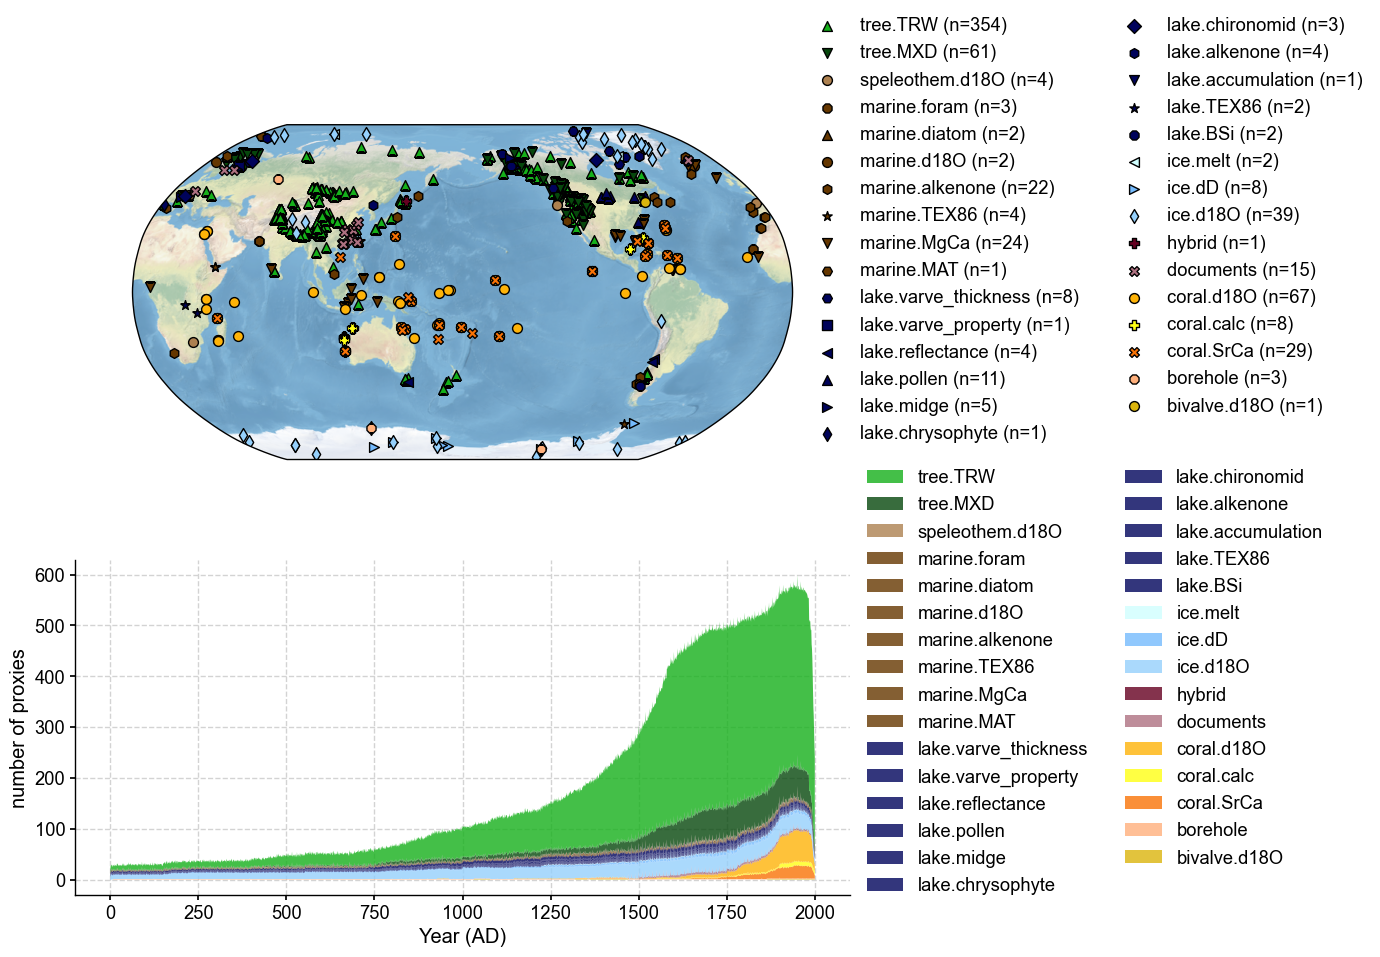

In [3]:
fig, ax = job.proxydb.plot(plot_count=True)

In [4]:
job.filter_proxydb(by='ptype', keys=['coral'])
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'])

Annualizing ProxyDatabase: 100%|██████████| 104/104 [00:02<00:00, 38.73it/s]


In [5]:
job.load_clim(
    tag='prior',
    path_dict={
        'tas': 'iCESM_past1000historical/tas',
    },
    anom_period=(1951, 1980),
)

>>> The target file seems existed at: ./data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...


In [6]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': 'gistemp1200_GHCNv4_ERSSTv5',
    },
    rename_dict={'tas': 'tempanomaly'},
    anom_period=(1951, 1980),
)

>>> The target file seems existed at: ./data/gistemp1200_GHCNv4_ERSSTv5.nc.gz . Loading from it instead of downloading ...


In [7]:
ptype_psm_dict = {
    'coral.d18O': 'Linear',
    'coral.calc': 'Linear',
    'coral.SrCa': 'Linear',
}

ptype_season_dict = {
    'coral.d18O': [12, 1, 2],
    'coral.calc': [12, 1, 2],
    'coral.SrCa': [12, 1, 2],
}

job.calib_psms(
    ptype_psm_dict=ptype_psm_dict,
    ptype_season_dict=ptype_season_dict,
    calib_period=(1850, 2015),
    verbose=True,
)

>>> job.configs["ptype_psm_dict"] = {'coral.SrCa': 'Linear', 'coral.d18O': 'Linear', 'coral.calc': 'Linear'}
>>> job.configs["ptype_season_dict"] = {'coral.SrCa': [12, 1, 2], 'coral.d18O': [12, 1, 2], 'coral.calc': [12, 1, 2]}
>>> job.configs["psm_calib_period"] = (1850, 2015)


Calibrating the PSMs:  18%|█▊        | 19/104 [00:00<00:02, 41.24it/s]

The number of overlapped data points is 14 < 25. Skipping ...
The number of overlapped data points is 20 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...


Calibrating the PSMs:  28%|██▊       | 29/104 [00:00<00:01, 41.21it/s]

The number of overlapped data points is 9 < 25. Skipping ...
The number of overlapped data points is 24 < 25. Skipping ...


Calibrating the PSMs:  57%|█████▋    | 59/104 [00:01<00:01, 41.90it/s]

The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  81%|████████  | 84/104 [00:02<00:00, 41.58it/s]

The number of overlapped data points is 21 < 25. Skipping ...


Calibrating the PSMs: 100%|██████████| 104/104 [00:02<00:00, 41.26it/s]

>>> PSM for Ocn_144 failed to be calibrated.
>>> PSM for Ocn_149 failed to be calibrated.
>>> PSM for Ocn_150 failed to be calibrated.
>>> PSM for Ocn_145 failed to be calibrated.
>>> PSM for Ocn_152 failed to be calibrated.
>>> PSM for Ocn_164 failed to be calibrated.
>>> PSM for Ocn_165 failed to be calibrated.
>>> PSM for Ocn_138 failed to be calibrated.
>>> PSM for Ocn_183 failed to be calibrated.
>>> 95 records tagged "calibrated" with ProxyRecord.psm created


In [8]:
job.forward_psms()

Forwarding the PSMs: 100%|██████████| 95/95 [00:14<00:00,  6.49it/s]


In [9]:
job.annualize_clim(tag='prior', months=[12, 1, 2], verbose=True)
job.regrid_clim(tag='prior', nlat=42, nlon=63, verbose=True)
job.crop_clim(tag='prior', lat_min=-35, lat_max=35, verbose=True)

>>> job.configs["prior_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.prior updated
>>> job.configs["prior_regrid_nlat"] = 42
>>> job.configs["prior_regrid_nlon"] = 63
>>> Processing tas ...
>>> job.configs["prior_lat_min"] = -35
>>> job.configs["prior_lat_max"] = 35
>>> job.configs["prior_lon_min"] = 0
>>> job.configs["prior_lon_max"] = 360
>>> Processing tas ...


In [10]:
job.run_da_mc(
    save_dirpath='./recons/lmr-real-pages2k',
    recon_seeds=list(range(1, 11)),
    verbose=True,
)

>>> job.configs["recon_period"] = [0, 2000]
>>> job.configs["recon_loc_rad"] = 25000
>>> job.configs["recon_timescale"] = 1
>>> job.configs["recon_vars"] = ['tas']
>>> job.configs["nens"] = 100
>>> job.configs["recon_seeds"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
>>> job.configs["assim_frac"] = 0.75
>>> job.configs["save_dirpath"] = ./recons/lmr-real-pages2k
>>> job.configs["compress_params"] = {'zlib': True}
>>> job.configs["output_full_ens"] = False
>>> job.configs["recon_sampling_mode"] = fixed
>>> job.configs["trim_prior"] = True
>>> job.configs["allownan"] = False
>>> seed: 1 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:11<00:00, 174.66it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r01_recon.nc
>>> seed: 2 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:13<00:00, 147.34it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r02_recon.nc
>>> seed: 3 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:16<00:00, 120.77it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r03_recon.nc
>>> seed: 4 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:16<00:00, 121.72it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r04_recon.nc
>>> seed: 5 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:16<00:00, 122.88it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r05_recon.nc
>>> seed: 6 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:16<00:00, 120.13it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r06_recon.nc
>>> seed: 7 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:16<00:00, 119.14it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r07_recon.nc
>>> seed: 8 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:16<00:00, 119.02it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r08_recon.nc
>>> seed: 9 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:16<00:00, 118.67it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r09_recon.nc
>>> seed: 10 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:15<00:00, 128.07it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r10_recon.nc
>>> DONE! Total time spent: 3.50 mins.


In [11]:
res = cfr.ReconRes('./recons/lmr-real-pages2k')
res.load(['nino3.4', 'tas'], verbose=True)

>>> ReconRes.recons["nino3.4"] created
>>> ReconRes.da["nino3.4"] created
>>> ReconRes.recons["tas"] created
>>> ReconRes.da["tas"] created


In [12]:
target = cfr.ClimateField().fetch('20CRv3/tas', vn='air').rename('tas').get_anom((1951, 1980))

Fetching data: 100%|██████████| 291M/291M [00:11<00:00, 25.8MiB/s] 


>>> Downloaded file saved at: ./data/air.2m.mon.mean.nc


In [13]:
target = target.annualize(months=[12, 1, 2]).crop(lat_min=-35, lat_max=35)
target.da

<xarray.DataArray 'tas' (time: 181, lat: 71, lon: 360)>
array([[[-0.72366333, -0.75071716, -0.7328949 , ..., -0.7309723 ,
         -0.68304443, -0.675354  ],
        [-0.8072052 , -0.80418396, -0.7583313 , ..., -0.771698  ,
         -0.745224  , -0.7675171 ],
        [-0.7741394 , -0.765152  , -0.7289276 , ..., -0.80792236,
         -0.77575684, -0.7703705 ],
        ...,
        [-1.9167633 , -2.0245056 , -2.1382446 , ..., -1.4160156 ,
         -1.6085968 , -1.7595978 ],
        [-1.7813721 , -1.8453217 , -1.94104   , ..., -1.3635254 ,
         -1.518753  , -1.6648407 ],
        [-1.681366  , -1.8431091 , -1.9763184 , ..., -0.9181824 ,
         -1.0700226 , -1.392273  ]],

       [[-0.885142  , -0.8900859 , -0.90685016, ..., -0.9297587 ,
         -0.871226  , -0.86743164],
        [-1.0433044 , -1.0435995 , -1.0353903 , ..., -0.95008343,
         -0.95111084, -1.0016378 ],
        [-1.1193441 , -1.1181844 , -1.1027933 , ..., -1.0076599 ,
         -1.0325216 , -1.0857443 ],
...
        [-0.7697449 , -0.6768901 , -0.5923462 , ..., -0.56062824,
         -0.68392944, -0.78031415],
        [-0.87024945, -0.837382  , -0.76048785, ..., -0.61620075,
         -0.72455853, -0.82958984],
        [-0.6300557 , -0.6863912 , -0.7022502 , ..., -0.12608846,
         -0.24433391, -0.4693502 ]],

       [[ 1.1114197 ,  1.1156616 ,  1.1440125 , ...,  1.1346741 ,
          1.0916748 ,  1.070221  ],
        [ 0.9642334 ,  1.019104  ,  1.1342773 , ...,  1.1085205 ,
          1.0567322 ,  0.9859314 ],
        [ 0.92681885,  0.9468384 ,  0.9932251 , ...,  1.0208435 ,
          1.0012512 ,  0.94000244],
        ...,
        [ 1.573761  ,  1.3674316 ,  1.1996155 , ...,  2.4711304 ,
          2.2483215 ,  1.8666077 ],
        [ 2.556244  ,  2.3460693 ,  2.0101624 , ...,  3.1957703 ,
          3.0577087 ,  2.749237  ],
        [ 3.0726013 ,  2.9905396 ,  2.7269592 , ...,  2.7269897 ,
          2.9135742 ,  3.011139  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) int64 1836 1837 1838 1839 1840 ... 2012 2013 2014 2015 2016
Attributes:
    annualized:  1

/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


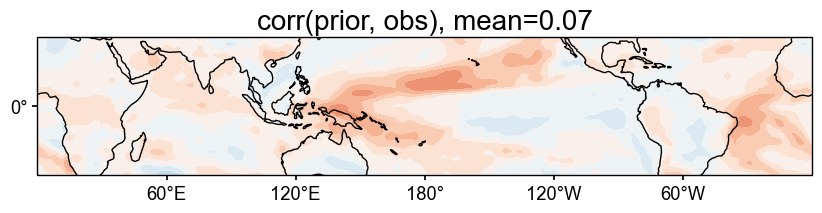

Figure saved at: "figs/pda_corr_prior_obs.pdf"


In [14]:
# validate the prior against 20CR
stat = 'corr'

valid_fd = job.prior['tas'].compare(
    target, stat=stat,
    timespan=(1874, 2000),
)

fig, ax = valid_fd.plot(
    title=f'{stat}(prior, obs), mean={valid_fd.geo_mean().value[0,0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-32, 32, 0, 360),
    plot_cbar=False,
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/pda_{stat}_prior_obs.pdf')

/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


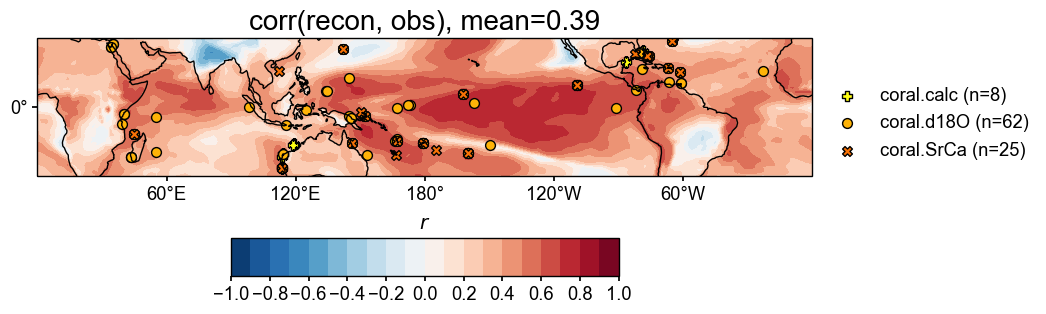

Figure saved at: "figs/pda_corr_recon_obs.pdf"


In [15]:
# validate the reconstruction against 20CR
valid_fd = res.recons['tas'].compare(
    target, stat=stat,
    timespan=(1874, 2000),
)
valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})

fig, ax = valid_fd.plot(
    title=f'{stat}(recon, obs), mean={valid_fd.geo_mean().value[0,0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-32, 32, 0, 360),
    plot_cbar=True,
    plot_proxydb=True, proxydb=job.proxydb.filter(by='tag', keys=['calibrated']),
    proxydb_lgd_kws={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/pda_{stat}_recon_obs.pdf')

In [16]:
target_nino34 = target.index('nino3.4')

<Axes: xlabel='Year (CE)'>

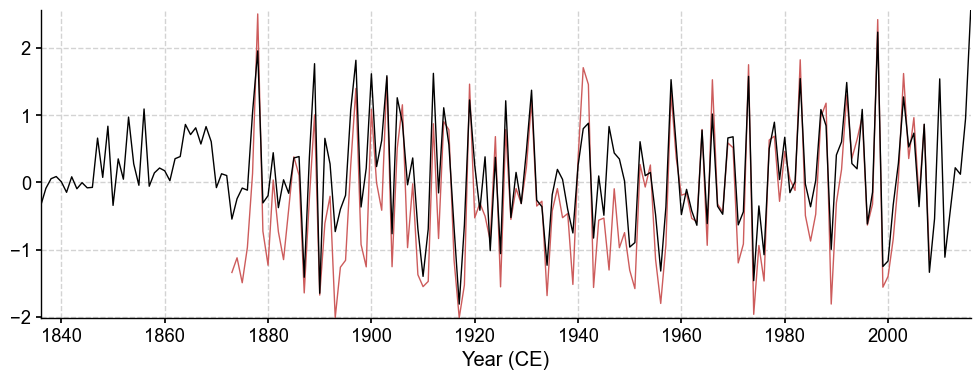

In [17]:
bc09 = cfr.EnsTS().fetch('BC09_NINO34')
bc09_ann = bc09.annualize(months=[12, 1, 2])
fig, ax = bc09_ann.plot()
target_nino34.plot(ax=ax, color='k')

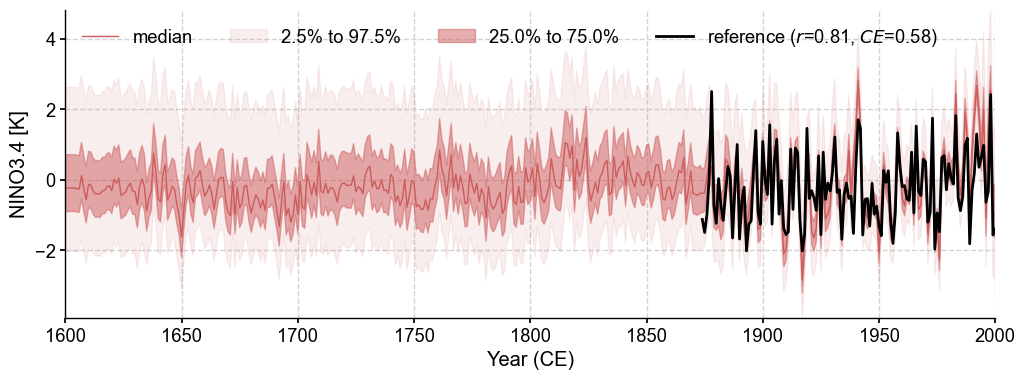

Figure saved at: "figs/pda_corr_recon_BC09.pdf"


In [18]:
fig, ax = res.recons['nino3.4'].compare(bc09_ann, timespan=(1874, 2000)).plot_qs()
ax.set_xlim(1600, 2000)
ax.set_ylabel('NINO3.4 [K]')
cfr.showfig(fig)
cfr.savefig(fig, f'./figs/pda_corr_recon_BC09.pdf')

In [21]:
res.recons['tas'][5].da

<xarray.DataArray 'tas' (lat: 16, lon: 63)>
array([[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
        -0.15664201, -0.15727968],
       [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
        -0.17302184, -0.16180553],
       [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
        -0.20724278, -0.21459715],
       ...,
       [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
         0.15664862,  0.16452859],
       [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
         0.24268749,  0.47150183],
       [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
         0.24656804,  0.35228925]])
Coordinates:
    time     int64 5
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0

In [22]:
res.recons['tas'][:5].da

<xarray.DataArray 'tas' (time: 5, lat: 16, lon: 63)>
array([[[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]],

       [[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
...
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]],

       [[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]]])
Coordinates:
  * time     (time) int64 0 1 2 3 4
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0

In [53]:
res.recons['tas']['980'].da

<class 'str'>


<xarray.DataArray 'tas' (time: 1, lat: 16, lon: 63)>
array([[[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]]])
Coordinates:
  * time     (time) int64 980
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0

In [57]:
res.recons['tas'][['980', '990']].da

<xarray.DataArray 'tas' (time: 2, lat: 16, lon: 63)>
array([[[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]],

       [[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]]])
Coordinates:
  * time     (time) int64 980 990
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0

In [59]:
res.recons['tas']['980':'990'].da

<xarray.DataArray 'tas' (time: 10, lat: 16, lon: 63)>
array([[[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]],

       [[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
...
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]],

       [[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]]])
Coordinates:
  * time     (time) int64 980 981 982 983 984 985 986 987 988 989
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0

In [65]:
res.recons['tas']['980':'991':'5'].da

<xarray.DataArray 'tas' (time: 3, lat: 16, lon: 63)>
array([[[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]],

       [[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
...
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]],

       [[-0.15727968, -0.15421713, -0.10890538, ..., -0.21399516,
         -0.15664201, -0.15727968],
        [-0.16180553, -0.15322975, -0.15060807, ..., -0.19161802,
         -0.17302184, -0.16180553],
        [-0.21459715, -0.20536038, -0.28475315, ..., -0.21416185,
         -0.20724278, -0.21459715],
        ...,
        [ 0.16452859,  0.16742235,  0.11516313, ...,  0.09828607,
          0.15664862,  0.16452859],
        [ 0.47150183,  0.13276517,  0.23444088, ...,  0.19875048,
          0.24268749,  0.47150183],
        [ 0.35228925,  0.45078369,  0.35072554, ...,  0.16592054,
          0.24656804,  0.35228925]]])
Coordinates:
  * time     (time) int64 980 985 990
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0

In [66]:
job.prior['tas'][5:9].da

<xarray.DataArray 'tas' (time: 4, lat: 16, lon: 63)>
array([[[-0.23154283, -0.31169484, -0.40029666, ..., -0.02309066,
         -0.13096341, -0.23154283],
        [-0.17981553, -0.28631887, -0.38353841, ...,  0.11524964,
         -0.05001464, -0.17981553],
        [-0.30348339, -0.34446585, -0.69333483, ..., -0.03613285,
         -0.19996535, -0.30348339],
        ...,
        [ 0.31690915,  0.35934566,  0.20088761, ...,  0.64094106,
          0.39948634,  0.31690915],
        [ 0.71224571,  0.28733156,  0.50980081, ...,  0.52163916,
          0.36577131,  0.71224571],
        [ 0.82551144,  1.08585243,  0.75950194, ...,  0.36935585,
          0.41790434,  0.82551144]],

       [[-0.39176261, -0.46942091, -0.25870136, ..., -0.19006435,
         -0.19226895, -0.39176261],
        [-0.20877397, -0.27691377, -0.14368494, ...,  0.02497152,
         -0.01741076, -0.20877397],
        [-0.18276358, -0.10680032, -0.17973036, ..., -0.13661935,
         -0.16276853, -0.18276358],
...
        [-1.32691517, -1.71046086, -1.38730606, ..., -1.15792949,
         -1.29510891, -1.32691517],
        [-0.46717042, -0.89418861, -0.73220792, ..., -0.36774355,
         -0.85625949, -0.46717042],
        [-0.38675867, -0.30696769, -0.24815505, ...,  0.15388346,
         -0.50975004, -0.38675867]],

       [[ 0.14879303,  0.22421316,  0.21973971, ...,  0.09908607,
          0.13702477,  0.14879303],
        [ 0.24542585,  0.27417172,  0.18290976, ...,  0.32054495,
          0.25852762,  0.24542585],
        [ 0.31705803,  0.29220566,  0.04928074, ...,  0.28445279,
          0.31669305,  0.31705803],
        ...,
        [-0.38321636, -0.69525574, -0.78810932, ..., -0.21474362,
         -0.35448147, -0.38321636],
        [ 0.04236999, -0.39781381, -0.51861141, ..., -0.04794309,
         -0.41223759,  0.04236999],
        [-0.14710434,  0.16920391,  0.07823111, ...,  0.18919268,
         -0.02678893, -0.14710434]]])
Coordinates:
  * time     (time) int64 855 856 857 858
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
Attributes:
    annualized:  1

In [67]:
job.prior['tas']['850':'900'].da

<xarray.DataArray 'tas' (time: 50, lat: 16, lon: 63)>
array([[[ 0.34472175,  0.34559306,  0.41304177, ...,  0.40357638,
          0.45877908,  0.34472175],
        [ 0.18924098,  0.15710749,  0.15639072, ...,  0.78248443,
          0.42728405,  0.18924098],
        [-0.04660962, -0.06021587, -0.02722403, ...,  0.34770957,
          0.06214012, -0.04660962],
        ...,
        [ 0.7996932 ,  0.29978376,  0.14274716, ...,  0.30147827,
          0.7574636 ,  0.7996932 ],
        [ 1.55329703,  1.06865251,  0.87644931, ...,  0.47799117,
          0.73258547,  1.55329703],
        [ 0.98683537,  1.31578038,  1.46681101, ...,  0.68701076,
          0.68573144,  0.98683537]],

       [[-0.74790741, -0.86311201, -0.4932611 , ..., -0.09431415,
         -0.37225288, -0.74790741],
        [-0.77381189, -0.70790603, -0.24576138, ..., -0.40284499,
         -0.62710126, -0.77381189],
        [-0.55957557, -0.35088748, -0.06148173, ..., -0.48829655,
         -0.52209557, -0.55957557],
...
        [ 0.10252802, -0.35770534, -0.19094151, ...,  0.74603109,
          0.82762735,  0.10252802],
        [ 1.0844401 ,  0.33015651,  0.02124238, ...,  0.36639282,
          0.96583074,  1.0844401 ],
        [ 0.98025708,  0.87095871,  0.11215112, ...,  0.74729304,
          1.24008722,  0.98025708]],

       [[-0.22836153, -0.10161319,  0.06663953, ..., -0.22108028,
         -0.36627091, -0.22836153],
        [-0.37128754, -0.1971118 , -0.1242747 , ..., -0.25513101,
         -0.39146533, -0.37128754],
        [-0.36804423, -0.23562231, -0.27309465, ..., -0.4534637 ,
         -0.42696835, -0.36804423],
        ...,
        [ 0.38892523,  0.53269929,  0.2203258 , ...,  0.30793669,
          0.09510127,  0.38892523],
        [-0.49015172, -1.09453647, -0.92212076, ..., -0.00792074,
         -0.43483548, -0.49015172],
        [-1.44125585, -1.07472968, -0.68975007, ..., -0.00859584,
         -1.01759343, -1.44125585]]])
Coordinates:
  * time     (time) int64 850 851 852 853 854 855 ... 894 895 896 897 898 899
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
Attributes:
    annualized:  1

In [68]:
job.prior['tas']['1850':'1900'].da

<xarray.DataArray 'tas' (time: 50, lat: 16, lon: 63)>
array([[[ 0.9743162 ,  0.36875264, -0.12573973, ...,  1.29041737,
          1.30861996,  0.9743162 ],
        [ 0.19234356, -0.1739533 , -0.44240871, ...,  0.79799941,
          0.62996648,  0.19234356],
        [-0.27858029, -0.41256861, -0.75864749, ...,  0.09200718,
         -0.08782075, -0.27858029],
        ...,
        [-1.01022168, -1.0670555 , -1.15329835, ..., -0.73350761,
         -0.87294406, -1.01022168],
        [-0.74039255, -1.33606767, -1.35133994, ..., -0.29546028,
         -0.50614515, -0.74039255],
        [-0.41968092, -0.4467038 , -0.69308205, ..., -0.34361734,
         -0.21977721, -0.41968092]],

       [[-0.33188138, -0.22480791, -0.0518506 , ...,  0.07914842,
         -0.21718238, -0.33188138],
        [-0.28164772, -0.15931424, -0.08730486, ..., -0.1858565 ,
         -0.30556308, -0.28164772],
        [-0.35137217, -0.29675937, -0.29233113, ..., -0.37562511,
         -0.39138919, -0.35137217],
...
        [-1.1948661 , -1.07726882, -1.30385178, ..., -0.50588303,
         -0.91348284, -1.1948661 ],
        [-0.90793773, -1.48268196, -1.16402263, ..., -0.65517526,
         -1.28056495, -0.90793773],
        [-1.13842276, -0.7417221 , -0.54495511, ..., -0.1598875 ,
         -0.63262853, -1.13842276]],

       [[-0.19542784,  0.01666572,  0.22689037, ..., -0.27695312,
         -0.16393082, -0.19542784],
        [-0.25927584,  0.00625284,  0.17774898, ..., -0.42934705,
         -0.36101985, -0.25927584],
        [-0.11808691,  0.11471644, -0.17884168, ..., -0.35357355,
         -0.2725136 , -0.11808691],
        ...,
        [ 0.7975996 ,  0.36267436,  0.09011183, ..., -0.42444332,
          0.81985873,  0.7975996 ],
        [ 1.54670647,  0.99335301,  0.50720212, ..., -0.40875502,
          0.51072535,  1.54670647],
        [ 1.38466434,  1.597635  ,  0.91461023, ..., -0.3716704 ,
          0.13800321,  1.38466434]]])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 1895 1896 1897 1898 1899
  * lat      (lat) float64 -32.93 -28.54 -24.15 -19.76 ... 24.15 28.54 32.93
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
Attributes:
    annualized:  1